`Task 2 :`**Movies Rating Prediction**

`Done by:Mohamad Moallem`

below will be the area where all the libraries we need will be called 

In [1]:
import pandas as pd#for cleaning and manipulating data#
import numpy as np#for mathmatical computation and array manipulation#
import matplotlib.pyplot as plt#for data visualization#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error,r2_score,root_mean_squared_error,root_mean_squared_log_error

lets start by loading our data set and understanding it 

In [2]:
data_set = pd.read_csv("IMDb Movies India.csv", sep=',', encoding='latin-1')
data_set.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
data_set.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
data_set.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

we can see that we have alot of missing values in our data set where every single column has above 500 missing values except the name where it has no missing values 

now i will only fill the missing values of the rating and voting column and drop the rest of the missing values in every column

but before that i will drop the columns that are of no use to us (do not impact the rating proccess) the name of the movie while movies with catchy names might be viewed more frequantly it has visible impact on the rating of the movie like the actors, and directors...

In [ ]:
data_set.drop(columns='Name',inplace=True)
data_set.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


i would like to drop the Duration column because i think it should not have any impact on the rating of the movie there are long movies that have high rating and low ratings i think the duration is not relevant to the rating of a movie like the content is.

the same goes for the year the movie was produced some old movies are rated much higher than newer ones like (forzen 1 which is rated better than frozen 2 which years after the original frozen movie)

In [7]:
data_set.drop(columns=['Duration','Year'],inplace=True)
data_set.head()

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


now we can start by dropping the rows with Nan values from every column. I would have filled the Nan values in the voting and ratings columns with the most frequent occurences or mean/median but i think that would add some bias to our data set so i would rather just drop them also our data set is big enough to do that. 

In [8]:
data_set=data_set.dropna()

In [9]:
data_set.shape

(7558, 7)

In [10]:
data_set.isnull().sum()

Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

checking for duplicated values

In [11]:
data_set.duplicated().sum()

0

we have no duplicated values we can continue

now we have a clean data set with no missing values and all the columns are relvant to our target(rating) result we can start by tranforming our data set in a way that the it is easier for our model to read like converting the genre which has categorical data and change it into numerical data

In [12]:
data_set['Genre'].value_counts()

Genre
Drama                              1137
Drama, Romance                      443
Action, Crime, Drama                417
Action                              391
Drama, Family                       291
                                   ... 
Family, Drama, Thriller               1
Action, Musical, War                  1
Action, Fantasy, Horror               1
Horror, Crime, Thriller               1
Documentary, Biography, Musical       1
Name: count, Length: 416, dtype: int64

there are lots of distinct values in Genre,Director,and Actor 1,2,3 so it is better to use targetencoder instead of labelencoder which is sensitive to ordinal relationships also onehot encoding can add higher dimensionality by adding a column for every distinct value which is not favorable also since we have multiple columns with a huge amount of distinct values

In [13]:
te = ce.TargetEncoder(cols=['Genre','Director','Actor 1','Actor 2','Actor 3'])
data_set[['Genre','Director','Actor 1','Actor 2','Actor 3']] = te.fit_transform(data_set[['Genre','Director','Actor 1','Actor 2','Actor 3']], data_set['Rating'])

In [14]:
data_set.head()

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,6.345910,7.0,8,5.965810,5.958492,5.965810,5.965810
3,5.700006,4.4,35,5.627528,5.739776,5.627528,5.618050
5,6.202931,4.7,827,5.618646,5.350950,5.801892,5.797343
6,5.995171,7.4,"1,086",6.172825,5.505122,5.851254,5.970584
8,5.710685,5.6,326,5.783658,5.783658,5.825411,5.783658


now what remains is to standarize the Votes since they have some large extreme values that can skew our data and affect the results 

In [15]:
data_set['Votes'] = data_set['Votes'].str.replace(',', '').astype(float)
scaler = StandardScaler()
data_set['Votes'] = scaler.fit_transform(data_set[['Votes']])

In [16]:
data_set.head()

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,6.345910,7.0,-0.170302,5.965810,5.958492,5.965810,5.965810
3,5.700006,4.4,-0.168027,5.627528,5.739776,5.627528,5.618050
5,6.202931,4.7,-0.101292,5.618646,5.350950,5.801892,5.797343
6,5.995171,7.4,-0.079468,6.172825,5.505122,5.851254,5.970584
8,5.710685,5.6,-0.143507,5.783658,5.783658,5.825411,5.783658


now that we have cleaned and transformed our data we can start by diving deeper in our visualisation by checking the correlation between our data we can start with a correlation matrix and a heatmap showing the correlation between each column

<Axes: >

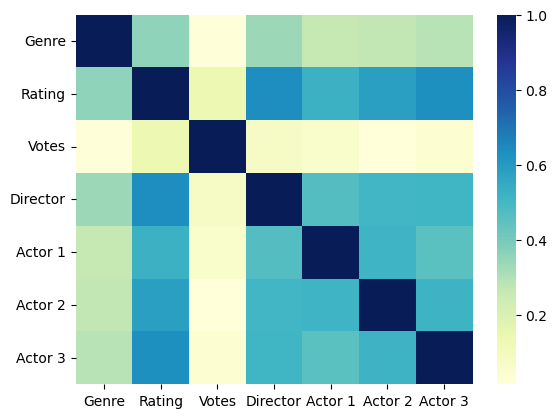

In [17]:
sns.heatmap(data_set.corr(),cmap='YlGnBu')

In [18]:
corr_matrix=data_set.corr()#correlation matrix
display(corr_matrix['Rating'].sort_values(ascending=False))


Rating      1.000000
Director    0.637665
Actor 3     0.633371
Actor 2     0.580776
Actor 1     0.525106
Genre       0.356826
Votes       0.134655
Name: Rating, dtype: float64

we can see a strong positive correlation between the director,Actor 3,Actor 2, and Actor 1 with a moderate postive correlation from the Genre and a weak postive correlation from the Votes

lets draw some scatter plot to view the correlations better 

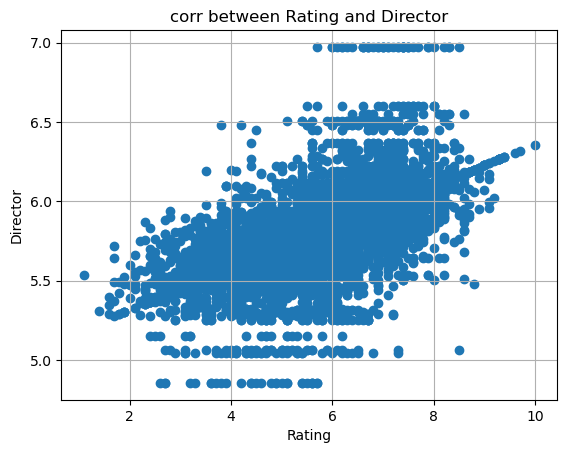

In [19]:
plt.scatter(data_set['Rating'],data_set['Director'])
plt.grid()
plt.title('corr between Rating and Director')
plt.xlabel('Rating')
plt.ylabel('Director')
plt.show()


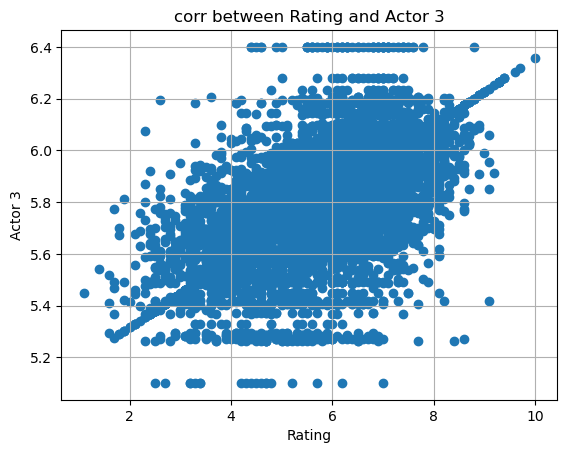

In [20]:
plt.scatter(data_set['Rating'],data_set['Actor 3'])
plt.grid()
plt.title('corr between Rating and Actor 3')
plt.xlabel('Rating')
plt.ylabel('Actor 3')
plt.show()


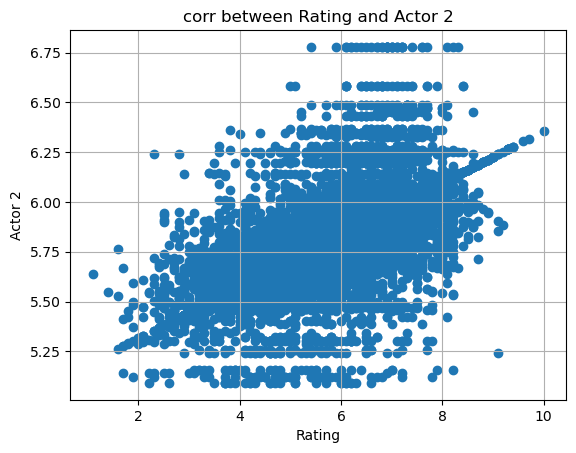

In [21]:
plt.scatter(data_set['Rating'],data_set['Actor 2'])
plt.grid()
plt.title('corr between Rating and Actor 2')
plt.xlabel('Rating')
plt.ylabel('Actor 2')
plt.show()


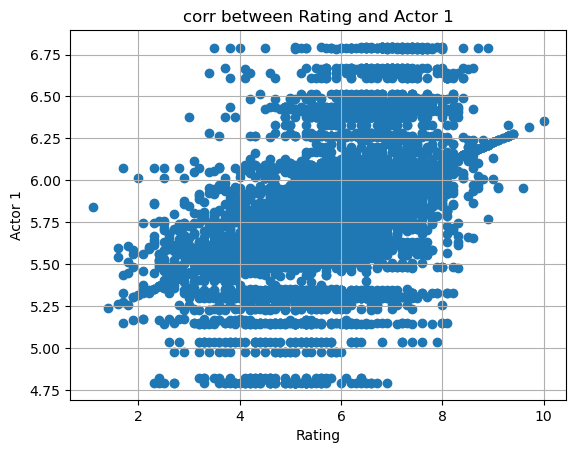

In [22]:
plt.scatter(data_set['Rating'],data_set['Actor 1'])
plt.grid()
plt.title('corr between Rating and Actor 1')
plt.xlabel('Rating')
plt.ylabel('Actor 1')
plt.show()


we can see a clear increasing trend in the scatter plot above showing the positive correlation we deduced via the corr matrix

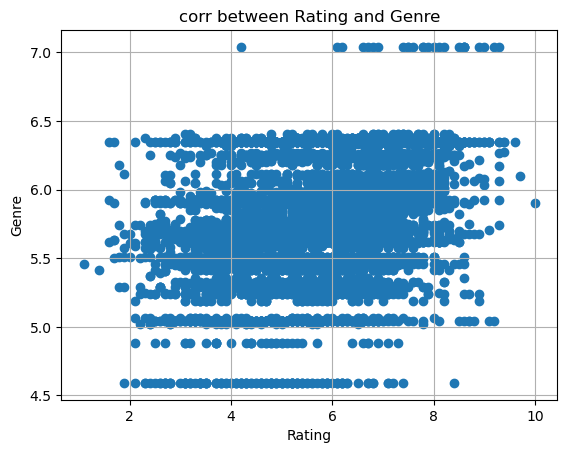

In [23]:
plt.scatter(data_set['Rating'],data_set['Genre'])
plt.grid()
plt.title('corr between Rating and Genre')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.show()


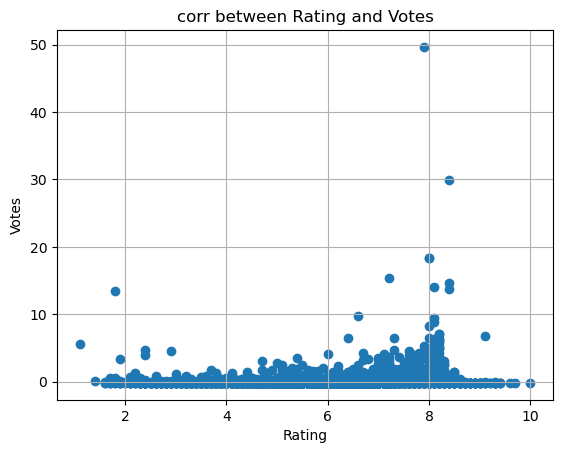

In [24]:
plt.scatter(data_set['Rating'],data_set['Votes'])
plt.grid()
plt.title('corr between Rating and Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()


in the above two scatter plots there is an increasing trend but it is not as clear as the others above showing a moderate-weak postive correlation

now that everything is done and prepared we can continue to the next phase by choosing our model since our data is labeled we will choose a supervised model our model is not for classification so we will be using regression models like linear regression,and random forest regression.. 

lets start first with training a linear regression model but first we need to split our data into training and testing data sets

In [25]:
X = data_set.drop('Rating', axis=1)
y = data_set['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6046, 6)
(1512, 6)
(6046,)
(1512,)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

now our model is trained using our training data all thats left is to test its accuracy

In [28]:
y_pred = model.predict(X_test) # predicted the output

In [29]:
display(y_pred)

array([7.60915579, 6.08379169, 6.49076242, ..., 7.93207267, 7.29142755,
       5.34208807])

In [30]:
r2_score(y_test,y_pred)

0.5874402059219452

we can see that the model is not perfect but captures some patterns and there is still room for improvment

In [31]:
mean_absolute_percentage_error(y_test,y_pred)

0.13656767250583005

In [32]:
root_mean_squared_log_error(y_test,y_pred)

0.14579922544695537

In [33]:
root_mean_squared_error(y_test,y_pred)

0.874303272151713

lets try another model i will try to use the knn model maybe it yields better results

In [34]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can change n_neighbors based on your tuning

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

In [35]:
display(y_pred_knn)

array([7.34, 5.5 , 6.38, ..., 6.68, 7.18, 5.34])

In [36]:
r2_score(y_test,y_pred_knn)

0.6698322834181019

In [37]:
mean_absolute_percentage_error(y_test,y_pred_knn)

0.11236029339633982

In [38]:
root_mean_squared_log_error(y_test,y_pred_knn)

0.12988547619033688

In [39]:
root_mean_squared_error(y_test,y_pred_knn)

0.7821426276243291

we can see that knn yeilded better results than the linear regression model 

we now can tune our model by changing the number of neighbors to obtain better results 

In [40]:
# Using a different number of neighbors and weighting scheme
knn_model_1 = KNeighborsRegressor(n_neighbors=15)
knn_model_1.fit(X_train, y_train)
y_pred_knn1 = knn_model.predict(X_test)

In [41]:
r2_score(y_test,y_pred_knn1)

0.6698322834181019

In [42]:
mean_absolute_percentage_error(y_test,y_pred_knn1)

0.11236029339633982

In [43]:
root_mean_squared_log_error(y_test,y_pred_knn1)

0.12988547619033688

In [44]:
root_mean_squared_error(y_test,y_pred_knn1)

0.7821426276243291

we can see no further improvment in the model when increaing or decreasing the n neighbors

lets pull out our models predictions 

In [45]:
KNeighborsRegressor_prediction = pd.DataFrame({
    "Prediction": y_pred
})

KNeighborsRegressor_prediction.to_csv("prediction_KNeigbors_Regression.csv", index=False)